# Section 2.4.1: Linear eigenvalue statistics

This page contains an application example of Theorem 2.12: estimating population eigenvalues, in the *fully separable case*.

## Contents

    - Empirical eigenvalues of $\frac1n X X^T$ versus limiting spectrum
    - Visualization of local behavior of Stieltjes transform $m(x)$ around eigvanlue $\lambda_i$ of $\frac1n X X^T$
    - Population eigenvalue versus the proposed large dimensional estimator
    - Eigenvalue estimation error as a function of population eigenvalue distance

## Empirical eigenvalues of $\frac1n X X^T$ versus limiting spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
pi = np.pi

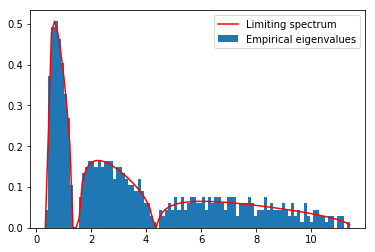

In [2]:
coeff = 3
p = 200*coeff
n = 1000*coeff
c = p/n

eig_C = [1,3,7]
cs = [1/3,1/3,1/3]
eigs_C = np.concatenate([eig_C[0]*np.ones(int(p*cs[0])),eig_C[1]*np.ones(int(p*cs[1])),eig_C[2]*np.ones(int(p*cs[2]))])
C = np.array(np.diag(eigs_C)) # population covariance

Z = np.array(np.random.randn(p,n))
X = scipy.linalg.sqrtm(C) @ Z

SCM = X @ X.T/n # sample covariance matrix and its empirical spectral measure
eigs_SCM = np.sort(np.linalg.eig(SCM)[0])
edges = np.linspace(np.min(eigs_SCM)-.1,np.max(eigs_SCM)+.1,100)

y  = 1e-5
zs = edges+y*1j
mu = []

tilde_m=0
for z in zs:

    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )

    m = tilde_m/c+(1-c)/(c*z)
    mu.append(np.imag(m)/pi)

# limiting versus empirical spectral measure of SCM    
plt.hist(eigs_SCM,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges,mu,'r',label='Limiting spectrum')
_ = plt.legend()


## Visualization of local behavior of Stieltjes transform $m(x)$ around eigvanlue $\lambda_i$ of 

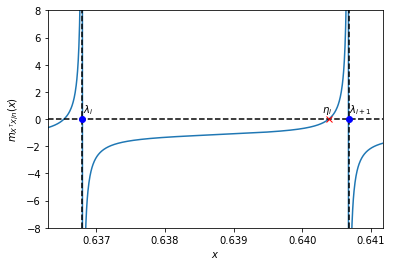

In [3]:
m = lambda x : np.sum(1/(eigs_SCM-x))/n - (n-p)/x/n

Tol1 = 5e-4
index_eigs_SCM = min(max(p-n,0)+50,p-1)
zoom_eigs_SCM  = np.linspace(eigs_SCM[index_eigs_SCM]-Tol1,eigs_SCM[index_eigs_SCM+1]+Tol1,1000)

#Tol2 = 3e-5
#zoom_eigs_SCM[ [ i for i in range(len(zoom_eigs_SCM)) if zoom_eigs_SCM[i]<=eigs_SCM[index_eigs_SCM]+Tol2 and zoom_eigs_SCM[i]>=eigs_SCM[index_eigs_SCM]-Tol2 ] ]=np.nan
#zoom_eigs_SCM[ [ i for i in range(len(zoom_eigs_SCM)) if zoom_eigs_SCM[i]<=eigs_SCM[index_eigs_SCM+1]+Tol2 and zoom_eigs_SCM[i]>=eigs_SCM[index_eigs_SCM+1]-Tol2] ]=np.nan

# numerical evaluation of zeros of m
zeros_m = np.sort(np.linalg.eig(np.array(np.diag(eigs_SCM)) - np.array(np.sqrt(eigs_SCM)).reshape(p,1) @ np.array(np.sqrt(eigs_SCM)).reshape(p,1).T/n)[0])
zero_m  = zeros_m[ [ i for i in range(len(zeros_m)) if zeros_m[i]<eigs_SCM[index_eigs_SCM+1] and zeros_m[i]>eigs_SCM[index_eigs_SCM] ] ]

plt.plot(zoom_eigs_SCM,[ m(x) for x in zoom_eigs_SCM ])
plt.axvline(x=eigs_SCM[index_eigs_SCM],c='k',ls='--')
plt.axvline(x=eigs_SCM[index_eigs_SCM+1],c='k',ls='--')
plt.axhline(y=0,c='k',ls='--')
plt.gca().set_xlim(eigs_SCM[index_eigs_SCM]-Tol1,eigs_SCM[index_eigs_SCM+1]+Tol1)
plt.gca().set_ylim(-8,8)
plt.xlabel(r'$x$')
plt.ylabel(r'$m_{X^T X/n}(x)$')

plt.plot(eigs_SCM[index_eigs_SCM],0,'bo')
plt.text(eigs_SCM[index_eigs_SCM]+1e-5,.5,r'$\lambda_i$')
plt.plot(eigs_SCM[index_eigs_SCM+1],0,'bo')
plt.text(eigs_SCM[index_eigs_SCM+1]+1e-5,.5,r'$\lambda_{i+1}$')
plt.plot(zero_m, 0,'rx')
plt.text(zero_m-1e-4,.5,r'$\eta_i$')
_ = plt.show()

## Population eigenvalue versus the proposed large dimensional estimator

In [4]:
def popu_eigs_estim(eigs_SCM,n,cs):
#   popu_eigs_estim: large n,p consitent estimator of the (k-discrete) population eigvalues of C
#   INPUT: eigenvalues of SCM X'*X/n eigs_SCM (of dimension n*n), data
#   dimension p and cs the vector of p_a/p, for a=1,...k
#   OUTPUT: vector of estimated k population eigenvalues

    popu_eig = []
    zeros_m = np.sort(np.linalg.eig(np.array(np.diag(eigs_SCM)) - np.array(np.sqrt(eigs_SCM)).reshape(p,1) @ np.array(np.sqrt(eigs_SCM)).reshape(p,1).T/n)[0])
    
    eigs_SCM = eigs_SCM[::-1]
    zeros_m  = zeros_m[::-1]
    
    diff_pole_zero = eigs_SCM - zeros_m

    index=0
    for c in cs:
        popu_eig.append(n/p/c*np.sum(diff_pole_zero[index:int(index+p*c-1)]))
        index = int(index+p*c)
    
    return popu_eig


In [5]:
print('Population eigenvalues:')
print(np.sort(eig_C)[::-1])
print('Naive (and biased) estimation by averaging over each component:')
print([np.mean(eigs_SCM[2*p//3:n]), np.mean(eigs_SCM[p//3:2*p//3]), np.mean(eigs_SCM[0:p//3])])
print('RMT-improved estimator:')
print(popu_eigs_estim(eigs_SCM,n,cs))

Population eigenvalues:
[7 3 1]
Naive (and biased) estimation by averaging over each component:
[7.423821886583185, 2.750487344277665, 0.8222204462773448]
RMT-improved estimator:
[6.963987757364061, 2.990142736922942, 0.9966105503574194]


## Eigenvalue estimation error as a function of population eigenvalue distance

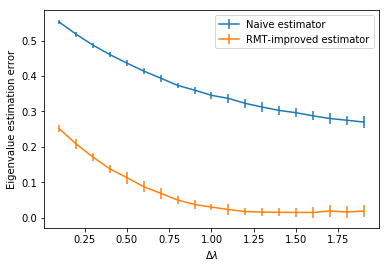

In [6]:
coeff = 1
p = 256*coeff
n = 1024*coeff
c = p/n

delta_lambda_loop = np.arange(.1,2,.1)

nb_average_loop = 30
error_store_naive = np.zeros( (len(delta_lambda_loop),nb_average_loop) )
error_store_RMT = np.zeros( (len(delta_lambda_loop),nb_average_loop) )


for delta_lambda_index in range(len(delta_lambda_loop)):
    delta_lambda = delta_lambda_loop[delta_lambda_index]

    eig_C = [1,1+ delta_lambda]
    cs = [1/2, 1/2]
    eigs_C = np.concatenate([eig_C[0]*np.ones(p//2),eig_C[1]*np.ones(p//2)])
    C = np.array(np.diag(eigs_C)) # population covariance

    for average_loop in range(nb_average_loop):
        Z = np.array(np.random.randn(p,n))
        X = scipy.linalg.sqrtm(C)@Z
        SCM = X@X.T/n
        eigs_SCM = np.sort(np.linalg.eig(SCM)[0])
        
        estim_eig_naive = np.array([np.mean(eigs_SCM[0:int(cs[0]*p)]), np.mean(eigs_SCM[int(cs[0]*p):p])])
        estim_eig_RMT = np.sort(popu_eigs_estim(eigs_SCM,n,cs))
        
        error_store_naive[delta_lambda_index,average_loop] = np.linalg.norm(estim_eig_naive - eig_C)
        error_store_RMT[delta_lambda_index,average_loop] = np.linalg.norm(estim_eig_RMT - eig_C)

plt.errorbar(delta_lambda_loop, np.mean(error_store_naive,axis=1), 2*np.std(error_store_naive,axis=1),label='Naive estimator')
plt.errorbar(delta_lambda_loop, np.mean(error_store_RMT,axis=1), 2*np.std(error_store_RMT,axis=1),label='RMT-improved estimator')
_ = plt.legend()
plt.xlabel(r'$\Delta \lambda$')
plt.ylabel(r'Eigenvalue estimation error')
_ = plt.show()
